Assignment: PCA Implementation

Objective:

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:
- Download the wine dataset from the UCI Machine Learning Repository
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

Deliverables:
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

In [1]:
import pandas as pd 
df = pd.read_csv('/Users/aakanksha/My_Codes/data-science-master-course/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Check dataset info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### There are 1599 entries in this dataset. 

### Check Dataset Description

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Check null values in dataset

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### No Missing values found in dataset

### Checking Duplicates

In [5]:
df.duplicated().sum()

240

### There are 240 duplicate values. Using drop duplicate we are going to removing the duplicate values

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


### After dropping duplicate values, there are 1359 entries. 

### Split Dataset into X and Y

In [8]:
X = df.drop(labels=['quality'],axis=1)
y = df[['quality']]

In [9]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [10]:
y.head()

,quality
0,5
1,5
2,5
3,6
5,5


### Performing Standard Scaler on dataset

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374


### Performing PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.61718452,  0.48304706, -1.76538065, ...,  0.0112697 ,
        -0.91806225, -0.16843296],
       [-0.7597499 ,  1.85190223, -0.87078223, ...,  0.11236163,
         0.91703154, -0.93595834],
       [-0.7299115 ,  0.89022684, -1.15338249, ...,  0.02257443,
         0.40172915, -0.47673072],
       ...,
       [-2.17130497,  0.89054086,  1.80767947, ...,  0.07209456,
        -0.73430392, -0.68163713],
       [-2.23816515,  0.98568537,  0.64387164, ...,  0.02869917,
        -0.89944475, -0.38554554],
       [-0.43087385, -0.54842879,  1.61710742, ...,  0.42771134,
        -0.55491419,  1.1749135 ]])

In [13]:
pca.explained_variance_

array([3.11463065, 1.90963071, 1.54848881, 1.25140218, 0.96159103,
       0.63807782, 0.58733624])

In [14]:
pca.explained_variance_ratio_

array([0.28293989, 0.17347505, 0.14066813, 0.11368012, 0.08735304,
       0.05796439, 0.05335491])

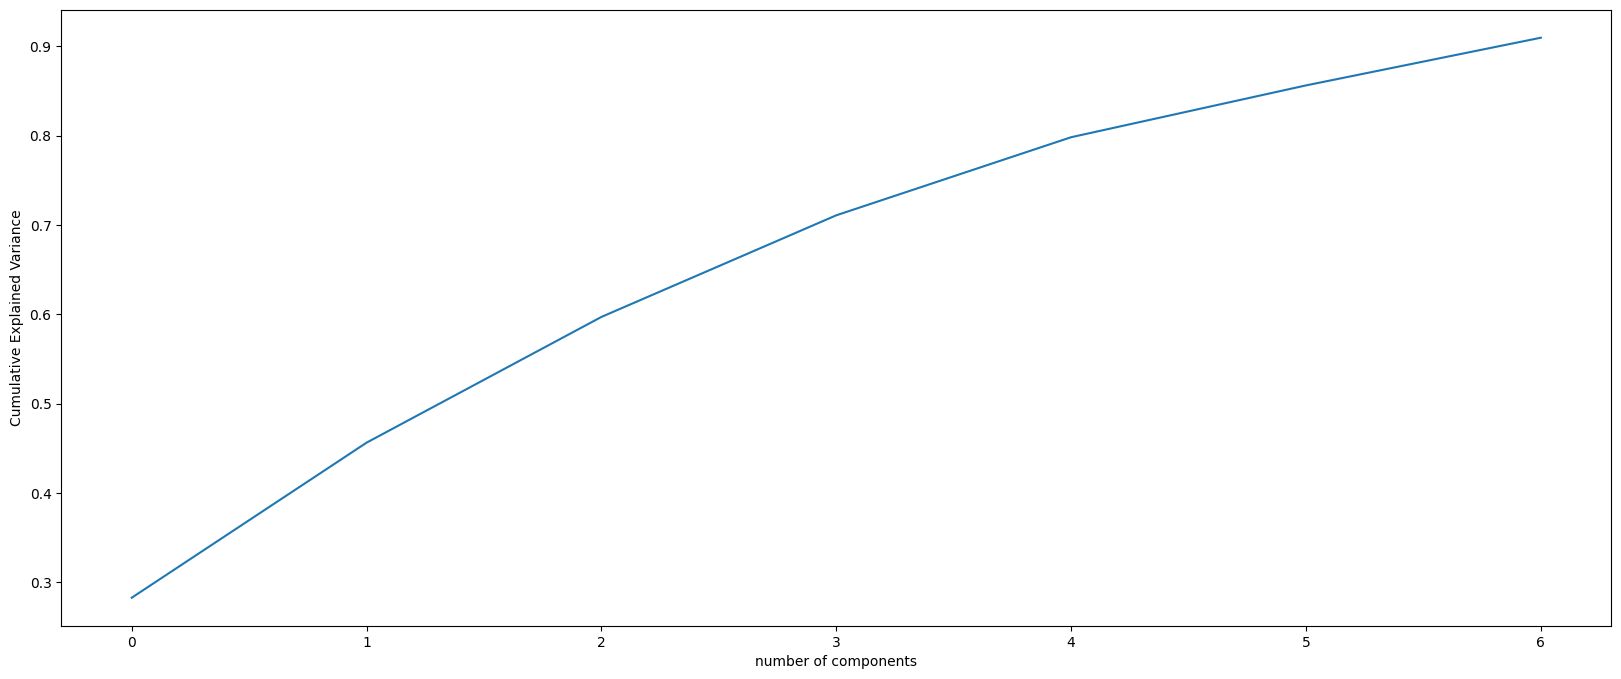

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Assuming 90% variance, there should be 7 principal components. 

### Visualize results of scatterplot

In [16]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

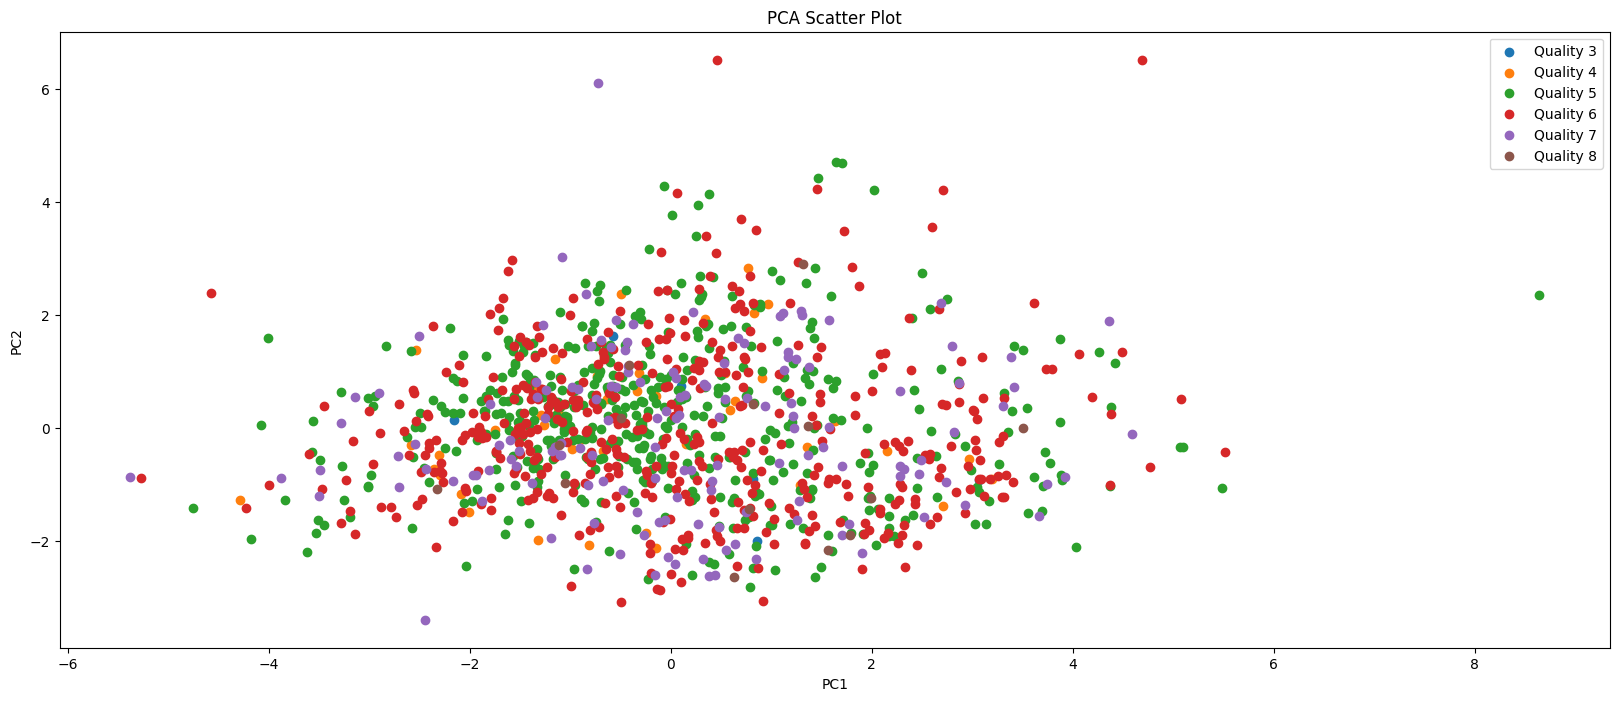

In [17]:
# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Add the target variable 'quality' to the DataFrame
pca_df['quality'] = y

# Create a scatter plot
plt.figure(figsize=(20, 8))
for quality in range(3, 9):
    plt.scatter(pca_df[pca_df['quality'] == quality]['PC1'],
                pca_df[pca_df['quality'] == quality]['PC2'],
                label=f'Quality {quality}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.legend()
plt.show()

### Perform K-means Clustering

In [18]:
from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=6, random_state=42)

### Interpreting results of kmeans clustering

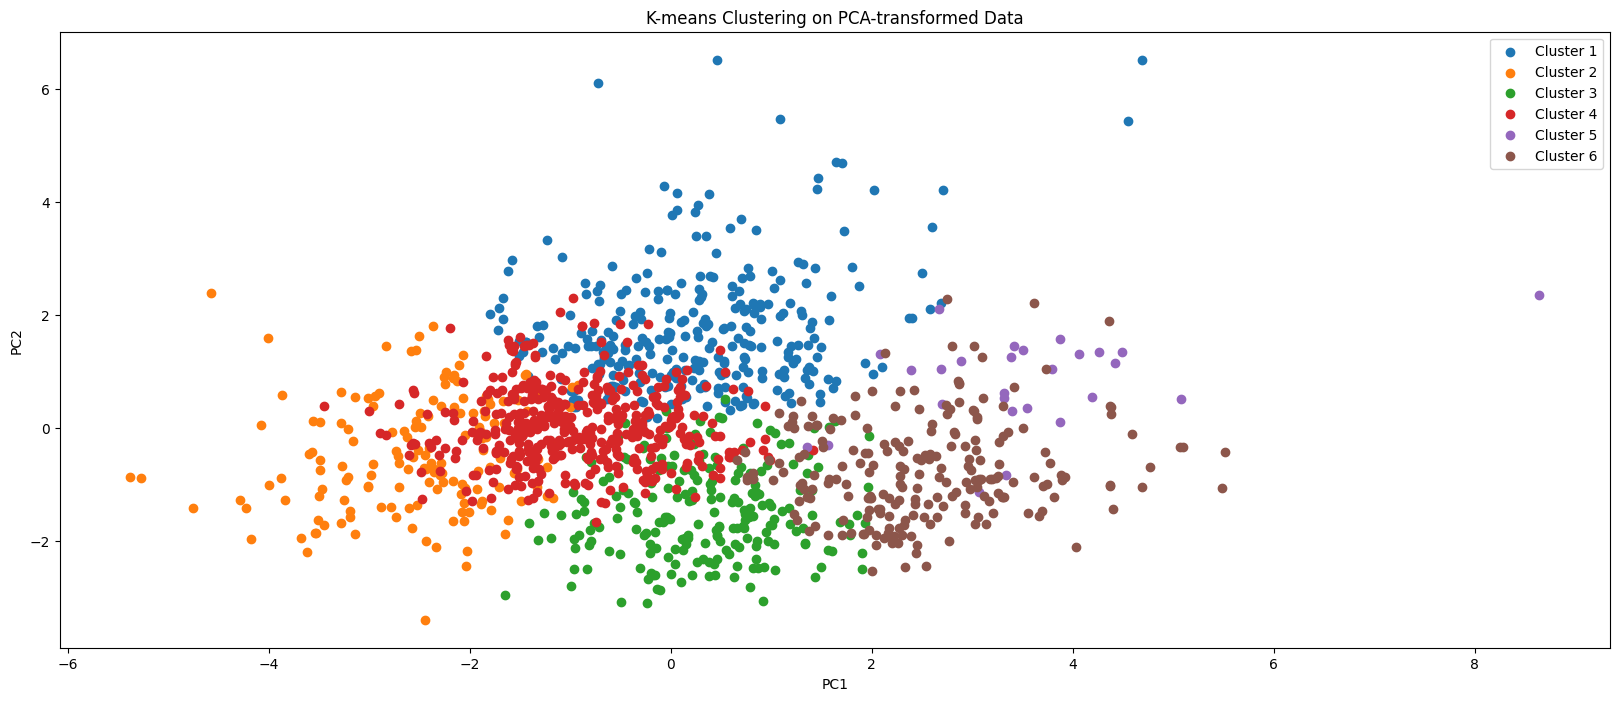

In [20]:
# Add the cluster labels to the PCA DataFrame
pca_df['cluster'] = kmeans.labels_

# Create a scatter plot with color-coded clusters
plt.figure(figsize=(20, 8))
for cluster in range(6):
    plt.scatter(pca_df[pca_df['cluster'] == cluster]['PC1'],
                pca_df[pca_df['cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster + 1}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering on PCA-transformed Data')
plt.legend()
plt.show()

### Interpretation of Clustering results

- Actual Clusters and Predicted clusters are very similar excluding some exceptions.
- PC1 and PC2 are not enough to explore this data

### Interpreting result in 3D to get a better understand about the result

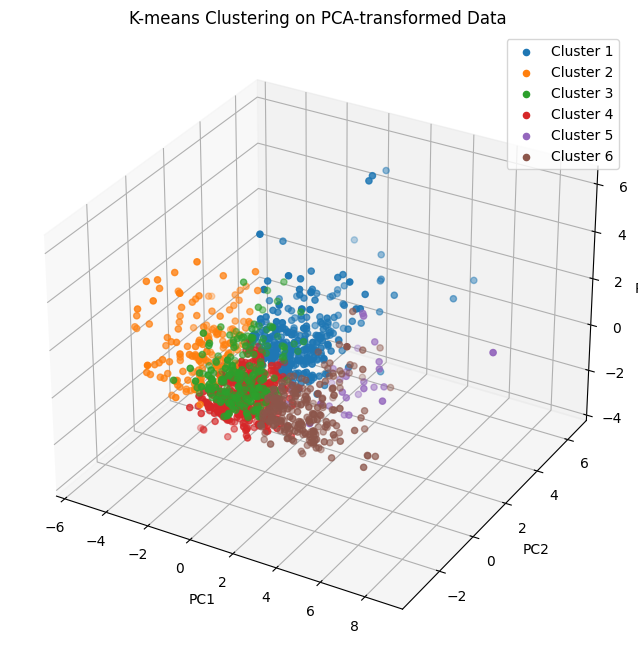

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot with color-coded clusters
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(6):
    ax.scatter(X_pca[pca_df['cluster'] == cluster, 0],
               X_pca[pca_df['cluster'] == cluster, 1],
               X_pca[pca_df['cluster'] == cluster, 2],
               label=f'Cluster {cluster + 1}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('K-means Clustering on PCA-transformed Data')

plt.legend()
plt.show()


### to visulize the result in #D using Plotly click on the below link

https://colab.research.google.com/drive/1SxIMQRfTY-J1HaVMRzsT14Sy3Asjn_zM